In [ ]:
%tensorflow_version 2.3
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.preprocessing import normalize

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from google.colab import files
import io
uploaded = files.upload()


Saving mot-samples-30hz.csv to mot-samples-30hz.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['mot-samples-30hz.csv']),names=['T','label','ax','ay','az','gx','gy','gz'],index_col='T')
df_g = df[['gx','gy','gz']]
df_a = df[['ax','ay','az']]
df_l = df[['label']]

df.groupby(['label']).count()
#df.shape


,ax,ay,az,gx,gy,gz
label,,,,,,
0,3920,3920,3920,3920,3920,3920
1,7800,7800,7800,7800,7800,7800
2,7980,7980,7980,7980,7980,7980
3,3900,3900,3900,3900,3900,3900
4,3280,3280,3280,3280,3280,3280
5,3540,3540,3540,3540,3540,3540
6,5840,5840,5840,5840,5840,5840
7,4440,4440,4440,4440,4440,4440
8,3160,3160,3160,3160,3160,3160


In [ ]:


#normalize 
g_min=-90
g_max=90
a_min=-1
a_max=1
n_df_g=(df_g-g_min)/(g_max-g_min) * 255
n_df_a=(df_a-a_min)/(a_max-a_min) * 255

df_t = pd.concat([df_l,n_df_a,n_df_g], axis=1).astype(np.float32)

a3d_0 = np.array(list(df_t[df_t['label']==0].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_0 = [0]*len(a3d_0)
a3d_1 = np.array(list(df_t[df_t['label']==1].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_1 = [1]*len(a3d_1)
a3d_2 = np.array(list(df_t[df_t['label']==2].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_2 = [2]*len(a3d_2)
a3d_3 = np.array(list(df_t[df_t['label']==3].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_3 = [3]*len(a3d_3)
a3d_4 = np.array(list(df_t[df_t['label']==4].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_4 = [4]*len(a3d_4)
a3d_5 = np.array(list(df_t[df_t['label']==5].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_5 = [5]*len(a3d_5)
a3d_6 = np.array(list(df_t[df_t['label']==6].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_6 = [6]*len(a3d_6)
a3d_7 = np.array(list(df_t[df_t['label']==7].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_7 = [7]*len(a3d_7)
a3d_8 = np.array(list(df_t[df_t['label']==8].groupby(['T']).apply(pd.DataFrame.to_numpy)))[:,:,1:]
y_8 = [8]*len(a3d_8)



X= np.concatenate((a3d_0,a3d_1,a3d_2,a3d_3,a3d_4,a3d_5,a3d_6,a3d_7,a3d_8),axis=0)
#Remove back
#X= np.concatenate((a3d_0,a3d_1,a3d_3,a3d_4,a3d_5,a3d_6,a3d_7,a3d_8),axis=0)
X=np.expand_dims(X,axis=-1)

Y=np.concatenate((y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8),axis=0)
#Remove back
#Y=np.concatenate((y_0,y_1,y_3,y_4,y_5,y_6,y_7,y_8),axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

print (X_train.shape)

(1345, 20, 6, 1)


(3920, 7)

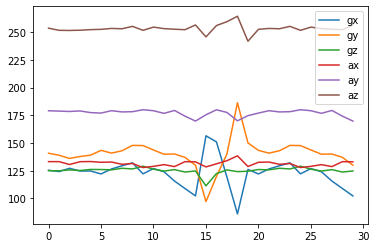

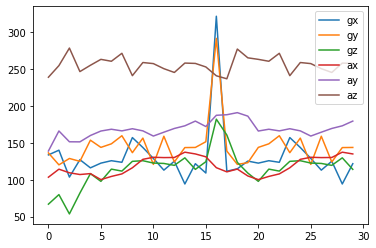

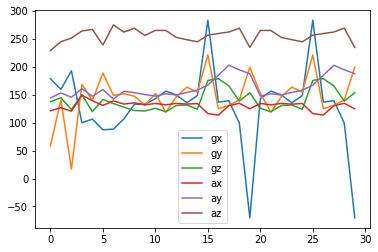

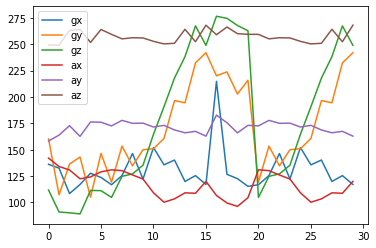

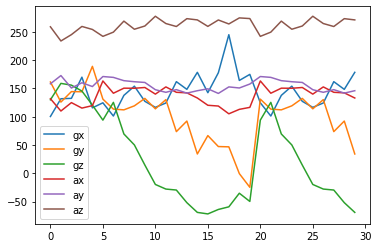

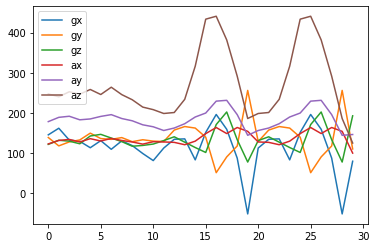

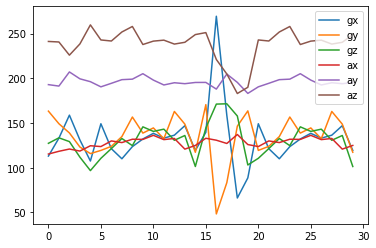

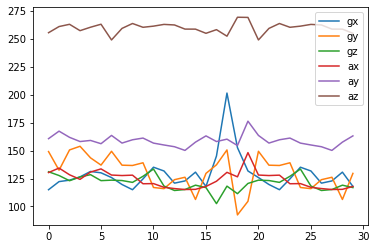

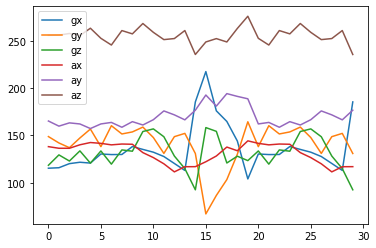

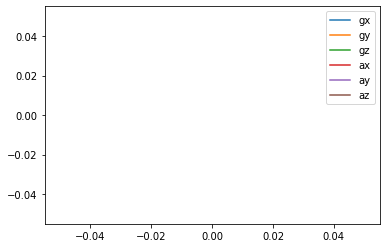

In [ ]:
begin_sample=000
end_sample=30

for _i in range(10):
  df_t[df_t['label']==_i].iloc[begin_sample:end_sample][['gx','gy','gz','ax','ay','az']].plot(use_index=False)
  #df_t[df_t['label']==_i].iloc[begin_sample:end_sample][['ax','ay','az']].plot(use_index=False)
df_t[df_t['label']==0].shape



In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(
          16
          , (4, 3),
          padding="same",
          activation="relu",
          input_shape=(20, 6, 1)),  # output_shape=(batch, 128, 3, 8)
      tf.keras.layers.MaxPool2D((3, 3)),  # (batch, 42, 1, 8)
      tf.keras.layers.Dropout(0.1),  # (batch, 42, 1, 8)
      tf.keras.layers.Conv2D(16, (4, 1), padding="same",
                             activation="relu"),  # (batch, 42, 1, 16)
      tf.keras.layers.MaxPool2D((3, 1), padding="same"),  # (batch, 14, 1, 16)
      tf.keras.layers.Dropout(0.1),  # (batch, 14, 1, 16)
      tf.keras.layers.Flatten(),  # (batch, 224)
      tf.keras.layers.Dense(16, activation="relu"),  # (batch, 16)
      tf.keras.layers.Dropout(0.1),  # (batch, 16)
      tf.keras.layers.Dense(9, activation="softmax")  # (batch, 4)
  ])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 6, 16)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 2, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 2, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 2, 16)          1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=350, 
                    validation_data=(X_test, y_test))

Epoch 1/350


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


43/43 [==============================] - 1s 11ms/step - loss: 12.4926 - accuracy: 0.1532 - val_loss: 1.9308 - val_accuracy: 0.4410
Epoch 2/350
43/43 [==============================] - 0s 6ms/step - loss: 2.5778 - accuracy: 0.2714 - val_loss: 2.0239 - val_accuracy: 0.4298
Epoch 3/350
43/43 [==============================] - 0s 6ms/step - loss: 2.2016 - accuracy: 0.3056 - val_loss: 1.9071 - val_accuracy: 0.4543
Epoch 4/350
43/43 [==============================] - 0s 7ms/step - loss: 2.0600 - accuracy: 0.3294 - val_loss: 1.8111 - val_accuracy: 0.4588
Epoch 5/350
43/43 [==============================] - 0s 6ms/step - loss: 2.0086 - accuracy: 0.3465 - val_loss: 1.7431 - val_accuracy: 0.4610
Epoch 6/350
43/43 [==============================] - 0s 7ms/step - loss: 1.9578 - accuracy: 0.3599 - val_loss: 1.7181 - val_accuracy: 0.4610
Epoch 7/350
43/43 [==============================] - 0s 5ms/step - loss: 1.8757 - accuracy: 0.3695 - val_loss: 1.6813 - val_accuracy: 0.4610
Epoch 8/350
43/43 [====

In [ ]:
np.argmax(model.predict(X_test[0:142]),axis=-1)
#model.predict(X_test[0:12])


array([7, 3, 7, 1, 1, 8, 4, 6, 7, 4, 5, 6, 0, 6, 7, 1, 5, 6, 3, 3, 0, 1,
       8, 3, 1, 6, 5, 1, 5, 7, 4, 7, 0, 1, 0, 3, 6, 3, 1, 8, 3, 0, 0, 7,
       0, 4, 1, 0, 1, 8, 1, 1, 3, 6, 7, 1, 8, 3, 6, 6, 4, 6, 1, 3, 4, 4,
       1, 7, 5, 1, 5, 7, 7, 3, 4, 6, 3, 1, 0, 1, 7, 7, 6, 7, 7, 0, 0, 1,
       0, 1, 6, 1, 3, 6, 7, 4, 1, 7, 7, 3, 5, 6, 0, 6, 4, 6, 8, 6, 0, 1,
       3, 3, 8, 3, 6, 4, 8, 1, 8, 1, 3, 1, 4, 4, 3, 3, 0, 7, 5, 1, 6, 6,
       1, 3, 4, 7, 1, 6, 1, 7, 0, 4])

In [ ]:
print (X_test.shape)
y_pred = np.argmax(model.predict(X_test),-1)
print (y_pred.shape)
print (y_test.shape)
print(classification_report(y_test, y_pred))

(449, 20, 6, 1)
(449,)
(449,)
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.91      0.91      0.91        90
           3       0.99      1.00      0.99        66
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00        36
           6       0.99      1.00      0.99        75
           7       0.86      0.92      0.89        60
           8       0.97      0.85      0.90        33

    accuracy                           0.96       449
   macro avg       0.96      0.95      0.96       449
weighted avg       0.96      0.96      0.96       449



In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open("mot-imu.tflite", "wb").write(model_no_quant_tflite)
files.download('mot-imu.tflite') 

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(50):
    yield([X_train[i].reshape(1,20,6,1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open("mot-imu-quant.tflite", "wb").write(model_tflite)
files.download('mot-imu-quant.tflite') 


INFO:tensorflow:Assets written to: /tmp/tmpcrqtq1f8/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

INFO:tensorflow:Assets written to: /tmp/tmpypza4ciu/assets


INFO:tensorflow:Assets written to: /tmp/tmpypza4ciu/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>